In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import pandas as pd
import pygame

# Capítulo 4

# Parte 1

# Exercício 1
**Objetivo: entender pixels como vetores em 3 dimensões**

Uma imagem digital é composta de pequenos pontinhos chamados pixels. Os pixels se organizam numa grade semelhante a uma matriz. Um pixel tem uma representação da cor que deve ser "pintada" naquele pontinho específico.

Uma das possíveis representações de cores é a RGB. Nessa representação, cores são representadas por três números, cada um deles correspondente à intensidade das componentes R (red - vermelho), G (green - verde) e B (blue - azul).

Como já vimos, a função `imread` abre uma imagem na forma de um `np.array` com as dimensões *altura*, *largura* e *cores*:

In [ ]:
image = mpimg.imread("rio_de_janeiro.jpg")
altura, largura, cores = image.shape

Podemos enfileirar nossos pixels em uma matriz com um pixel por coluna e uma cor por linha usando a instrução `reshape` e a transposição:

In [ ]:
X = image.reshape(altura*largura, cores).T
print(X.shape)
print(image[0,10,:], X[:,10])

(3, 273280)
[37 27 26] [37 27 26]


Depois, podemos voltar nossa matriz X para o formato de uma imagem, de forma que conseguimos desenhá-la na tela:

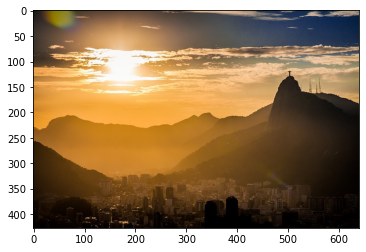

In [ ]:
Y = X.T.reshape(altura, largura, cores)
plt.figure()
plt.imshow(Y)
plt.show()

Altere os códigos acima para, *usando uma multiplicação matricial*, as componentes R e G da imagem sejam multiplicadas por 0.5. Dica: use a matriz `A` abaixo!

Dica 2: provavelmente você precisará usar o método `astype(int)` antes de mostrar sua imagem na tela!

In [ ]:
# Dica: use esta matriz para fazer a transformação:
A = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 1]])

# Exercício 2
**Objetivo: transformar uma imagem para o espaço YIQ**

O formato RGB nem sempre é o mais eficiente para todas as aplicações. Na época da TV analógica, o padrão NTSC usava o formato [YIQ](https://en.wikipedia.org/wiki/YIQ). Nesse formato, a componente Y é chamada de *luma*, e representa o brilho do pixel; as componentes I e Q representam a crominância, isto é, a cor do pixel, distribuída num espaço 2D.

Para mapear um pixel $x$ no formato RGB para um pixel $y$ no formato YIQ, é preciso fazer uma multiplicação matricial:

$$
y = Ax
$$

onde a matriz $A$ é pré-definida como abaixo:

In [ ]:
A = np.array( [[0.299, 0.587, 0.144], [0.5959, -0.2746, -0.3213], [0.2115, -0.5227, 0.3112]] )

Sabendo disso:

1. Faça um programa que converte uma imagem em RGB para uma imagem em YIQ.
2. Em seu programa, acrescente uma multiplicação matricial que remove (multiplica por zero) as componentes I e Q
3. Após, faça seu programa retornar a imagem para RGB
4. Por fim, seu programa deve mostrar a imagem resultante na tela. Se precisar, use o método `.astype(int)` para que sua matriz seja convertida para números inteiros!

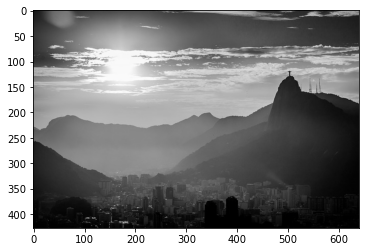

In [ ]:
# Solução
R = np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]])

X = image.reshape(altura*largura, cores).T
Y = A @ X
Y_ = R @ Y
X_ = np.linalg.inv(A) @ Y_
image_ = X_.T.reshape(altura, largura, cores).astype(int)
plt.figure()
plt.imshow(image_)
plt.show()

# Exercício 3
**Objetivo: formular matematicamente o procedimento de conversão**

No exercício anterior, executamos três multiplicações matriciais:

* A primeira, para converter a representação de RGB para YIQ;
* A segunda, para retirar as componentes I e Q;
* A terceira, para voltar a representação de YIQ para RGB.

1. Essas operações podem ser escritas como: $X' = A^{-1} R A X$. Associe cada uma dessas matrizes às suas respectivas operações.
2. Encontre uma única matriz $M$ que realiza as três operações simultaneamente, isto é, $X' = M X$. 
3. Substitua as operações no código do exercício anterior para que somente a matriz $M$ seja usada.

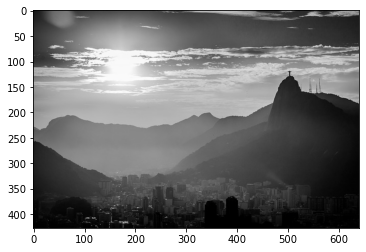

In [ ]:
# Solução
R = np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]])

X = image.reshape(altura*largura, cores).T
X_ = np.linalg.inv(A) @ R @ A @ X
image_ = X_.T.reshape(altura, largura, cores).astype(int)
plt.figure()
plt.imshow(image_)
plt.show()

# Exercício 4
**Aplicar um procedimento de distorção de cores**

Faça um código que, usando uma única multiplicação matricial:

1. Lê uma imagem em RGB,
2. Reduz sua componente luma (Y) para 20% do valor inicial,
3. Troca os valores das compontentes I e Q
4. Mostra a imagem resultante na tela.

Se você usar a imagem do Rio de Janeiro que temos usado como exemplo, provavelmente vai encontrar uma saída parecida com:

<img src='resultado_distorcao.png'>



In [ ]:
# Faça seu código aqui

# Exercício 5
**Objetivo: aplicar distorções de cor em tempo real**

O código abaixo tem um exemplo de leitura de câmera. Altere-o para incorporar as seguintes modificaçoes:

1. Ao pressionar 'r', a imagem mostrada na tela passa a ser somente a componente R da imagem capturada
2. Ao pressionar 'y', a imagem mostrada na tela passa a ser somente as componentes G e B da imagem capturada
3. Ao pressionar 'w', a imagem passa a estar em preto-e-branco
4. Ao pressionar 'e', a imagem passa a estar mais escura que o original
5. Ao pressionar 'p', as cores da imagem são distorcidas no espaço YIQ modificando somente as componentes I e Q.
6. Ao pressionar 'a', a imagem volta ao normal

Cada uma dessas funcionalidades deve ser implementada de forma que somente uma multiplicação matricial seja realizada no loop principal do programa. Dica: guarde as matrizes que realizam cada uma das operações e então o programa somente escolhe qual matriz será usada na multiplicação.

In [ ]:
import numpy as np

# Matriz RGB -> YIQ
A = np.array( [[0.299, 0.587, 0.144], [0.5959, -0.2746, -0.3213], [0.2115, -0.5227, 0.3112]] )

def distorcao_de_cor():
    # --- boilerplate code
    cap = cv.VideoCapture(0)
    if not cap.isOpened():
        print("Não consegui abrir a câmera!")
        exit()
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Não consegui capturar frame!")
            break
    # --- fim do boilerplate code

        # A variável image é um np.array com shape=(height, width, colors)
        image = np.array(frame).astype(float)/255
        H, W, C = image.shape
        #print(image.shape)
        X = image.reshape(H*W, C).T
        # --- vamos trabalhar nesta parte


        # --- fim da parte que vamos trabalhar
        image = X.T.reshape(H, W, C)

    # --- mais boilerplate code
        # Agora, mostrar a imagem na tela!
        cv.imshow('Distorcao_de_cor', image)
        
        # Se aperto 'q', encerro o loop
        # Use esse tipo de estrutura para implementar as outras interações!
        if cv.waitKey(1) == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()
    # --- fim do boilerplate code - e da função!

distorcao_de_cor()

# Parte 2

# Exercício 6
**Objetivo: realizar uma combinação linear de vetores**

Numa loja, vendem-se pacotes do tipo P1 e do tipo P2. O pacote P1 tem 3 brigadeiros e 1 coxinha. O pacote P2 tem 3 coxinhas e 1 brigadeiro. Gostaríamos de comprar 11 brigadeiros e 9 coxinhas. 

1. Quantos pactores do tipo P1 e do tipo P2 deveríamos comprar?
2. No plano cartesiano (brigadeiros x coxinhas), que vetor representa nossa compra?
3. No plano cartesiano (P1 x P2), que vetor representa nossa compra?
4. Qual é a matriz que permite converter uma compra escrita como "brigadeiros e coxinhas" para uma compra escrita como "P1 e P2"?

# Exercício 7
**Objetivo: modelar uma combinação linear**

Em um plano cartesiano, estamos inicialmente na origem e gostaríamos de nos mover para o vetor $v=[2, 3]$. Porém, só podemos nos movimentar ao longo dos vetores $w_1 = [-1, 1]$ e $w_2 = [1, -2]$.

Encontre quanto devemos andar nas direções $w_1$ e $w_2$ para chegar ao ponto $[1,1]$, isto é, quais são os valores de $a_1$ e $a_2$ tais que $a_1 w_1 + a_2 w_2 = [2,3]$.



# Exercício 8
**Objetivo: generalizar o resultado de uma combinação linear**

No exercício anterior, mapeamos um vetor $[2,3]$ para um vetor $[a_1, a_2]$.

1. Generalize sua solução para encontrar como chegar em um ponto genérico $v=[x,y]$.
2. Modifique o código abaixo para que ele mostre como cada vetor $[x,y]$ é mapeado para um vetor $[a_1, a_2]$

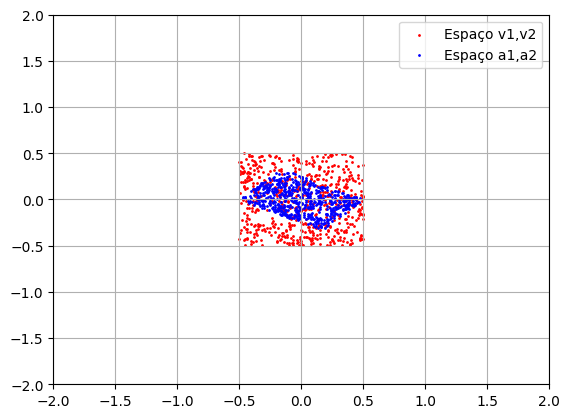

In [ ]:
# Comece com esse código inicial!
x = np.random.uniform(-0.5, 0.5, size=(2, 600))

# Altere daqui para baixo
# -----------------
v = np.linalg.inv(np.array([[-1, 1], [1, 2]])) @ x
# -----------------
# Altere daqui para cima

plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r', label='Espaço v1,v2')
plt.scatter(v[0,:], v[1,:], s=1, c='b', label='Espaço a1,a2')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.legend()
plt.show()

# Exercício 9
**Objetivo: aplicar o conceito de base para construir uma transformação**

No exercício anterior, tínhamos um vetor "original". Quanto temos um vetor "original", implicitamente ele está nos dizendo o quanto devemos "andar" na direção dos vetores que estão na matriz identidade. Por exemplo, o vetor $v=[2,3]$ pode ser entendido como:
$$
\begin{bmatrix}
 2 \\
 3
\end{bmatrix}
=
2
\begin{bmatrix}
 1 \\
 0
\end{bmatrix}

+ 

3
\begin{bmatrix}
 0 \\
 1
\end{bmatrix}
$$ 

Veja como essa soma de vetores pode ser representada graficamente:

# Um vetor é, implicitamente, a definição de uma soma ponderada de vetores da base canônica:
v = np.array([2, 3])
plt.figure(figsize=(5,5))
plt.arrow(0,0,v[0],v[1],length_includes_head=True,head_width=0.1)
plt.arrow(0,0,v[0],0,length_includes_head=True,head_width=0.1)
plt.arrow(v[0],0,0,v[1],length_includes_head=True,head_width=0.1)
plt.text(v[0]/2 - 0.85, v[1]/2, 'v=['+str(v[0])+', '+str(v[1])+']')
plt.text(v[0] + 0.1, v[1]/2, '3 x [0,1]')
plt.text(v[0]/2, -0.2, '2 x [1,0]')
plt.xlim([-1,4])  
plt.ylim([-1,4])
plt.grid()
plt.show()

Daí então, quando tentamos usar os vetores $w_1 = [-1, 1]$ e $w_2 = [1, -2]$ para compor nosso ponto, passamos a escrever:

$$
\begin{bmatrix}
 2 \\
 3
\end{bmatrix}
= a_1 w_1 + a_2 w_2 = 

a_1
\begin{bmatrix}
 -1 \\
 1
\end{bmatrix}

+ 

a_2
\begin{bmatrix}
 1 \\
 -2
\end{bmatrix}
$$ 

As duas representações (a original e a modificada) podem ser escritas como multiplicações matriciais:

$$
\begin{bmatrix}
 2 \\
 3
\end{bmatrix}
=

\begin{bmatrix}
 1 & 0\\
 0 & 1
\end{bmatrix}
\begin{bmatrix}
 2 \\
 3 
\end{bmatrix}

=

\begin{bmatrix}
 -1 & 1\\
 1 & -2
\end{bmatrix}
\begin{bmatrix}
 a_1 \\
 a_2 
\end{bmatrix}
$$

Agora, veja como passamos a entender o nosso vetor original ($[2,3]^T$) como uma multiplicação de dois elementos diferentes:

1. Uma matriz que contém os vetores que são usados como *base* para encontrar os pontos:

$$
B = 
\begin{bmatrix}
 -1 & 1\\
 1 & -2
\end{bmatrix}
=
\begin{bmatrix}
 w_1 & w_2 
\end{bmatrix}
$$

2. Um vetor que contém os coeficientes que devem multiplicar os vetores-base antes de somá-los, para então encontrar o ponto de referência.

$$
w=
\begin{bmatrix}
 a_1\\
 a_2 
\end{bmatrix}
$$

Por isso, dizemos que a vetor $w$ está na **base** $B$.

De forma mais geral, estamos dizendo que um vetor inicial $v$ pode ser escrito na base $B$ usando o vetor $w$ se:

$$
v = B w
$$

e, portanto, se conhecemos $v$ e $B$, então podemos encontrar $w$ resolvendo o sistema linear acima.

Por fim, dizemos que $v$ está na "base canônica" porque, implicitamente, os vetores-base de $v$ formam a matriz identidade, isto é:

$$
v = I v
$$

**Enunciado do exercício**

1. Se assumimos que a base de cores RGB é a base canônica, então um pixel em RGB pode ser escrito como um vetor $v$. Quais são os vetores-base que permitem transformar esse pixel para o espaço YIQ? Em outras palavras, quais são as colunas de $B$ tal que $X_{rgb} = B X_{yiq}$?
2. Se assumimos que a base de cores YIQ é a base canônica, então um pixel em YIQ pode ser escrito como um vetor $v$. Quais são os vetores-base que permitem transformar esse pixel para o espaço RGB? Em outras palavras, quais são as colunas de $C$ tal que $X_{yiq} = C X_{rgb}$?
3. Qual é a relação entre as matrizes $C$ e $B$ definidas acima?


# Parte 3

# Exercício 10
**Objetivo: fazer uma transformação de coordenadas usando referenciais**

Em algumas situações, não sabemos a priori qual é a matriz de transformações que realiza a transformação que desejamos. Um caso clássico disso é quando mapeamos quilômetros para pixels ao fazer um mapa digital. Em algumas situações, é possível pensar na transformação como uma concatenação de outras transformações (por exemplo, quando trata-se de uma translação seguida de uma rotação seguida de um cisalhamento). Em outras situações, temos apenas algumas referências.

Uma referência, neste caso, é quando dizemos: o vetor $[v_1, v_2]$ deve ser mapeado para o vetor $[w_1, w_2]$.

Se temos duas referências, então sabemos que:
* $[v_1^1, v_2^1] \rightarrow [w_1^1, w_2^1]$
* $[v_1^2, v_2^2] \rightarrow [w_1^2, w_2^2]$

e isso pode ser escrito na forma de matrizes:
$$
\begin{bmatrix}
v_1^1 \\
v_2^1
\end{bmatrix}
=
B

\begin{bmatrix}
w_1^1 \\
w_2^1
\end{bmatrix}

\hspace{0.1in}
\text{e}
\hspace{0.1in}

\begin{bmatrix}
v_1^2 \\
v_2^2
\end{bmatrix}
=
B

\begin{bmatrix}
w_1^2 \\
w_2^2
\end{bmatrix}
$$

As duas equações podem ser colocadas numa única, e então resolvemos:

$$
\begin{bmatrix}
v_1^1 & v_1^2\\
v_2^1 & v_2^2
\end{bmatrix}
=
B

\begin{bmatrix}
w_1^1 & w_1^2\\
w_2^1 & w_2^2
\end{bmatrix}

\\

V = BW\\
B = VW^{-1}
$$

Se tivermos mais uma dimensão nos nossos vetores, precisaremos, é claro, de mais um referencial. Mantendo a matriz $W$ inversível (isto é, evitando que ela tenha determinante $0$), precisamos de uma referência para cada dimensão de nossa matriz. Se decidirmos mapear figuras 2D permitindo a translação, faremos um mapeamento de três pontos para três pontos. Na figura abaixo, temos um exemplo de mapeamento desse tipo, mostrando os pontos que foram usados como referência, junto a uma núvem de pontos no espaço original e a núvem correspondente no espaço transformado: 

<img src='mapeamento_triangulos.png'>


Com isso em mente, encontre transformações à partir das referências abaixo. Se necessário, adicione uma dimensão aos pontos para tratar a translação.

(a) encontre uma transformação à partir das referências:

* $[0, 1] \rightarrow [0.5, 0.5]$
* $[1, 1] \rightarrow [0.7, 0.1]$

(b) lembrando de adicionar uma dimensão para a translação, encontre uma transformação à partir das referências:

* $[0, 0] \rightarrow [1, 1]$
* $[0, 1] \rightarrow [1.5, 1.5]$
* $[1, 1] \rightarrow [1.7, 1.1]$

### ANTES:

In [ ]:
import matplotlib.pyplot as plt
# Comece com esse código inicial!
x = np.random.uniform(-0.5, 0.5, size=(2, 600))

# Altere daqui para baixo
# -----------------
# Na questão (b), lembre-se de adicionar a linha de "1" à matriz x:
# x = np.vstack ( x, np.ones(600) )
v = x
# -----------------
# Altere daqui para cima

plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r', label='Espaço v1,v2')
plt.scatter(v[0,:], v[1,:], s=1, c='b', label='Espaço a1,a2')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.legend()
plt.show()

### DEPOIS:

In [ ]:
# A:
v1 = np.array([0, 1])
v2 = np.array([1, 1])

w1 = np.array([0.5, 0.5])
w2 = np.array([0.7, 0.1])

v = np.array([v1, v2]).T
w = np.array([w1, w2]).T

b = v@np.linalg.inv(w)
v,w

(array([[0, 1],
        [1, 1]]),
 array([[0.5, 0.7],
        [0.5, 0.1]]))

In [ ]:
#B:
v1 = np.array([0,0])
v2 = np.array([0,1])
v3 = np.array([1,1])

w1 = np.array([1,1])
w2 = np.array([1.5,1.5])
w3 = np.array([1.7,1.1])

v = np.array([v1, v2, v3]).T
w = np.array([w1, w2, w3]).T

v = np.vstack((v, np.ones((3))))
w = np.vstack((w, np.ones((3))))

b2 = v @ np.linalg.inv(w)
print(b2)

[[ 1.66666667e+00 -1.66666667e+00  0.00000000e+00]
 [ 1.33333333e+00  6.66666667e-01 -2.00000000e+00]
 [-2.22044605e-16  4.44089210e-16  1.00000000e+00]]


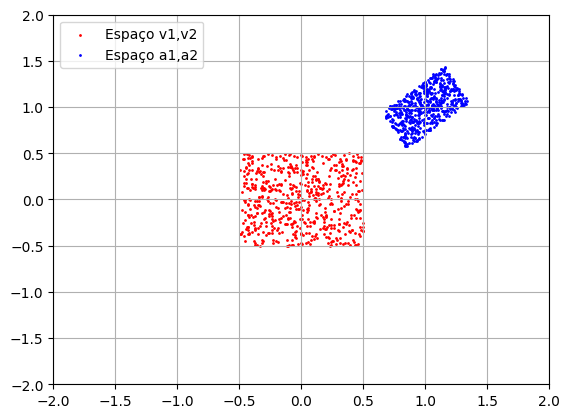

In [ ]:
# Comece com esse código inicial!
x = np.random.uniform(-0.5, 0.5, size=(2, 600))

# Altere daqui para baixo



# -----------------
# Na questão (b), lembre-se de adicionar a linha de "1" à matriz x:
# x = np.vstack ( x, np.ones(600) )

# v = np.linalg.inv(b) @ x # questao a
v = np.linalg.inv(b2) @ np.vstack((x, np.ones((600)))) # questao b

# -----------------
# Altere daqui para cima

plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r', label='Espaço v1,v2')
plt.scatter(v[0,:], v[1,:], s=1, c='b', label='Espaço a1,a2')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.legend()
plt.show()

# Exercício 11
**Objetivo: transformar dimensões do mundo real em dimensões (pixels) de imagem**

Em várias situações, temos medições feitas em unidades do mundo real, mas queremos representar os objetos correspondentes em imagens. Até o momento, sempre usamos a *engine* do `matplotlib` para isso. Por exemplo, se quisermos mostrar as posições (latitude/longitude) de todas as cidades do mundo, podemos usar um [banco de dados](https://simplemaps.com/data/world-cities) e deixar que `matplotlib` faça seu trabalho automaticamente:

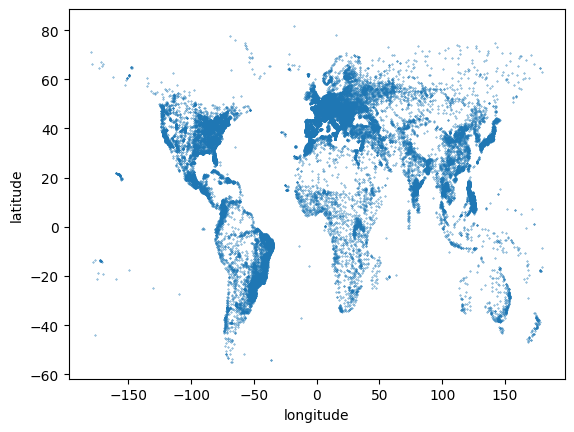

In [8]:
df = pd.read_csv('worldcities.csv')
# print("São Paulo:", df[df['city_ascii']=='Sao Paulo'][['lat', 'lng']])
# print("Rio de Janeiro:", df[df['city_ascii']=='Rio de Janeiro'][['lat', 'lng']])
# print("Belo Horizonte:", df[df['city_ascii']=='Belo Horizonte'][['lat', 'lng']])
cidades = df[['lat', 'lng']].astype(float).to_numpy().T
plt.figure()
plt.scatter(cidades[1,:], cidades[0,:], s=0.1)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

Neste exercício, vamos desenhar todas as cidades do mundo em uma imagem. Para isso, siga o seguinte roteiro:

1. Defina três pontos de referência que levem da base (latitude, longitude) para a base de posições em pixels, isto é, $[\text{latitude}, \text{longitude}] \rightarrow [\text{pixel}_i, \text{pixel}_j]$.
2. Com base nesses três pontos de referência, defina a transformação $B$ usando o procedimento que já vimos anteriormente.
3. Transforme cada uma das posições das cidades em uma posição em pixels. Lembre-se de converter os pixels para `int`!
4. Para cada cidade, atribua uma cor ao pixel correspondente na imagem.
5. Mostre sua imagem na tela com o comando `plt.imshow`.

[[-46.6339 -43.1964 -43.9419]
 [-23.5504 -22.9083 -19.9281]
 [  1.       1.       1.    ]] [[400. 399. 387.]
 [300. 310. 309.]
 [  1.   1.   1.]] [[ 3.32024793e-02  3.47070248e-01 -1.64035966e+02]
 [-2.51604132e-01  3.90495868e-02  6.53763769e+01]
 [ 1.38777878e-17 -8.67361738e-18  1.00000000e+00]]


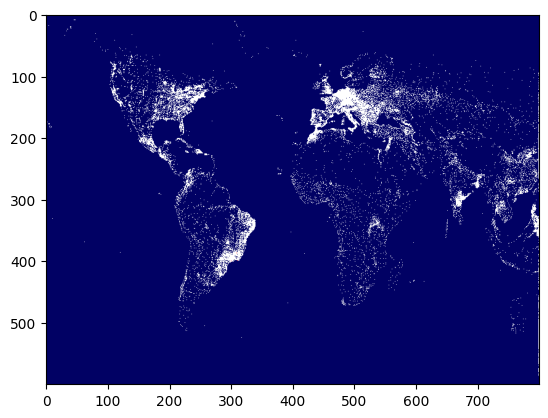

In [13]:
imagem = np.ones((600,800,3))

df = pd.read_csv('worldcities.csv')

sp = df[df['city_ascii']=='Sao Paulo'][['lng', 'lat']].astype(float).to_numpy()
rj = df[df['city_ascii']=='Rio de Janeiro'][['lng', 'lat']].astype(float).to_numpy()
bh = df[df['city_ascii']=='Belo Horizonte'][['lng', 'lat']].astype(float).to_numpy()
origem = np.array([sp[0], rj[0], bh[0]]).T
origem = np.vstack((origem, np.ones((origem.shape[1]))))

cidades = df[['lng', 'lat']].astype(float).to_numpy().T
cidades = np.vstack((cidades, np.ones((cidades.shape[1]))))

w1 = np.array([400, 300])
w2 = np.array([399, 310])
w3 = np.array([387, 309])

w = np.array([w1, w2, w3]).T
w = np.vstack((w, np.ones((3))))

B = origem @ np.linalg.inv(w)
print(origem,w,B)

destino = np.linalg.inv(B) @ cidades
destino = destino.astype(int)

imagem = np.ones((600,800,3))
imagem[:,:,2] = 100

destino[0,:] = np.clip(destino[0,:], 0, imagem.shape[0]-1)
destino[1,:] = np.clip(destino[1,:], 0, imagem.shape[1]-1)

imagem[destino[0,:], destino[1,:], :] = np.array([255, 255, 255])   
imagem[w.astype(int)[0,:], w.astype(int)[1,:], :] = np.array([255, 0, 0])

imagem = imagem.astype(int)

plt.figure()
plt.imshow(imagem)
plt.show()

# Exercício 12
**Objetivo: realizar uma mudança de referencial em tempo real**

Em algumas situações, como jogos digitais, gostaríamos de mudar o referencial sobre o qual estamos visualizando. Um exemplo disso é um jogo em primeira pessoa: embora o personagem, em relação ao mundo, possa caminhar por um espaço qualquer, toda a visão que o jogador tem é de acordo com o referencial do próprio personagem.

Neste exercício, vamos partir do pequeno jogo abaixo. Ao executar o código, você deve ver um personagem verde girando no meio de vários pontos vermelhos:

<img src="transforma_girando.gif" width=200>

Veja que a posição do jogador está no vetor `s`, que é recalculado a cada iteração do jogo.

1. Gostaríamos de manter nosso jogador sempre no centro da tela. Através de uma nova matriz $T$ (crie essa matriz!), transforme os pontos do vetor `pontos_loc` e do próprio vetor `s` de forma que a tela fique sempre centralizada no jogador. Seu resultado deveria ser um ponto verde parado na tela e vários pontos vermelhos girando ao redor dele. Lembre-se que o ponto central da tela é o ponto $(200,200)$ O resultado deve ser parecido com isso:

<img src="transforma_translacao.gif" width=200>

2. Após, gostaríamos de manter a "frente" do jogador sempre virada para cima, isto é, vamos fazer uma transformação para que todos os pontos do mundo virtual girem em torno do nosso personagem. O resultado deve ser algo parecido com:

<img src="transforma_rotacao.gif" width=200>

Dicas:

(a)
Uma matriz de *translação* se parece com:

$$
T = \begin{bmatrix}
1 & 0 & \Delta x \\
0 & 1 & \Delta y \\
0 & 0 & 1 
\end{bmatrix}
$$

(b)
Uma matriz de *rotação*, que realiza a rotação de vetores *ao redor da origem $[0,0]$*, se parece com:
$$
T = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{bmatrix}
$$

(c)
Se uma curva é parametrizada por $v = [f_x(t), f_y(t)]$, então o vetor tangente a ela é $v' = [f'_x(t), f'_y(t)]$.

(d)
O menor ângulo entre um vetor e o eixo horizontal é chamado argumento e pode ser calculado usando `np.angle(vetor)`.

### Exerc.1

In [1]:
import pygame
import numpy as np
pygame.init()

# Tenho aqui vários pontos sobre uma circunferência
angulo = np.linspace(0, 2*np.pi, 20)
pontos_loc = np.vstack ( (100*np.cos(angulo)+200, 100*np.sin(angulo)+200, np.ones(20)) )

# Controle de tempo
t = 0

# Velocidade angular (rotacoes por segundo)
v = 0.2

# Tamanho da tela e definição do FPS
screen = pygame.display.set_mode((400, 400))
clock = pygame.time.Clock()
FPS = 60  # Frames per Second

BLACK = (0, 0, 0)
COR_PERSONAGEM = (30, 200, 20)
COR_PONTOS = (200, 30, 20)

# Personagem
personagem = pygame.Surface((5, 5))  # Tamanho do personagem
personagem.fill(COR_PERSONAGEM)  # Cor do personagem

# Pontos 
pontos = pygame.Surface((5, 5))
pontos.fill(COR_PONTOS)  # Cor dos pontos

rodando = True
while rodando:
    # Capturar eventos
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            rodando = False

    # Controlar frame rate
    clock.tick(FPS)

    # Movimento do personagem
    t += 1/FPS
    theta = v*t
    s = np.array([[200],[200]]) + 100 * np.array([ [np.cos(2*np.pi*theta)], [-np.sin(2*np.pi*theta)]])
    s = np.vstack( (s, np.ones(1)))

    # Desenhar fundo
    screen.fill(BLACK)

    # Dica: use pontos_loc_y para receber o resultado das transformações feitas sobre pontos_loc
    transalacao = np.array([[1, 0, 200-s[0][0]], [0, 1, 200-s[1][0]], [0, 0, 1]])
    pontos_loc_y = transalacao @ pontos_loc

    # Desenhar pontos
    for p in range(pontos_loc.shape[1]):
        rect = pygame.Rect(pontos_loc_y[0:2,p], (2, 2))  # First tuple is position, second is size.
        screen.blit(pontos, rect)
        
    # Desenhar personagem
    rect = pygame.Rect([200,200], (10, 10))  # First tuple is position, second is size.
    screen.blit(personagem, rect)

    # Update!
    pygame.display.update()

# Terminar tela
pygame.quit()

pygame 2.5.2 (SDL 2.28.3, Python 3.10.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Exerc.2

In [2]:
import pygame
import numpy as np
pygame.init()

# Tenho aqui vários pontos sobre uma circunferência
angulo = np.linspace(0, 2*np.pi, 20)
pontos_loc = np.vstack ( (100*np.cos(angulo)+200, 100*np.sin(angulo)+200, np.ones(20)) )

# Controle de tempo
t = 0

# Velocidade angular (rotacoes por segundo)
v = 0.2

# Tamanho da tela e definição do FPS
screen = pygame.display.set_mode((400, 400))
clock = pygame.time.Clock()
FPS = 60  # Frames per Second

BLACK = (0, 0, 0)
COR_PERSONAGEM = (30, 200, 20)
COR_PONTOS = (200, 30, 20)

# Personagem
personagem = pygame.Surface((5, 5))  # Tamanho do personagem
personagem.fill(COR_PERSONAGEM)  # Cor do personagem

# Pontos 
pontos = pygame.Surface((5, 5))
pontos.fill(COR_PONTOS)  # Cor dos pontos

rodando = True
while rodando:
    # Capturar eventos
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            rodando = False

    # Controlar frame rate
    clock.tick(FPS)

    # Movimento do personagem
    t += 1/FPS
    theta = v*t
    s = np.array([[200],[200]]) + 100 * np.array([ [np.cos(2*np.pi*theta)], [-np.sin(2*np.pi*theta)]])
    s = np.vstack( (s, np.ones(1)))

    # Desenhar fundo
    screen.fill(BLACK)

    # Dica: use pontos_loc_y para receber o resultado das transformações feitas sobre pontos_loc
    transalacao = np.array([[1, 0, 200-s[0][0]], [0, 1, 200-s[1][0]], [0, 0, 1]])
    transalacao_origem = np.array([[1, 0, -200], [0, 1, -200], [0, 0, 1]])
    angulo = 2*np.pi*theta
    rotacao = np.array([[np.cos(angulo), -np.sin(angulo), 0], [np.sin(angulo), np.cos(angulo), 0], [0, 0, 1]])
    pontos_loc_y = np.linalg.inv(transalacao_origem) @ rotacao @ transalacao_origem  @transalacao @ pontos_loc

    # Desenhar pontos
    for p in range(pontos_loc.shape[1]):
        rect = pygame.Rect(pontos_loc_y[0:2,p], (2, 2))  # First tuple is position, second is size.
        screen.blit(pontos, rect)
        
    # Desenhar personagem
    rect = pygame.Rect([200,200], (10, 10))  # First tuple is position, second is size.
    screen.blit(personagem, rect)

    # Update!
    pygame.display.update()

# Terminar tela
pygame.quit()

# Parte 4

# Exercício 13
**Objetivo: Aplicar uma projeção de câmera pinhole usando semelhança de triângulos**

Uma câmera fotográfica funciona deixando a luz de objetos entrarem por um pequeno buraco. A luz, então, é projetada num anteparo que fica escuro, dentro da câmera, como nessa figura que tirei [daqui](https://www.360meridianos.com/2017/08/como-funciona-uma-camera-fotografica.html):

<img src="como-funciona-camera-fotografica.webp" style="transform:scaleX(-1)" width=500 height=300>

Há uma simulação interativa da câmera pinhole [aqui](https://www.geogebra.org/m/WEMWsPaa).

Neste exercício, vamos usar nossos conhecimentos de geometria para simular uma câmera no espaço 2D - mais especificamente, o plano cartesiano $x,y$.

Nosso "setup" será o seguinte:

* O *pinhole*, que é o buraco por onde a luz entra, ficará exatamente na origem do plano cartesiano, isto é, no ponto $[0,0]$.
* O anteparo está a uma distância $d$ do *pinhole*
* O anteparo ficará sobre a reta $x=-d$, que é a reta vertical que passa pelo ponto $[-d,0]$.
* Isso significa que todos os pontos em que $x<0$ estão "dentro" da câmera,
* e, por consequência, os pontos em que $x>0$ estão "fora" da câmera.

Um objeto que está no ponto $[x_o,y_o]$ deverá ser projetado no anteparo no ponto $[x_p, y_p]$:

<img src="pinhole_diagrama.png">

Neste momento, devemos encontrar qual é o ponto $[x_p, y_p]$.

Como a distância entre o anteparo e o *pinhole* é $d$, então com certeza $x_p=-d$.

Usando semelhança de triângulos, podemos deduzir que:

$$
\frac{y_p}{x_p} = \frac{y_o}{x_o} \Rightarrow \frac{y_p}{-d} = \frac{y_o}{x_o} \Rightarrow y_p = \frac{-d y_o}{x_o}
$$

Se achar interessante, veja a demonstração deste processo em vídeo:

<video width="640" height="480" controls>
  <source src="yp_semelhanca_de_triangulos.mp4" type="video/mp4">
</video>

Usando essas equações, e assumindo $d=1$, encontre:

1. Onde o ponto $[3, 3]$ será projetado?
2. Onde o ponto $[3, -3]$ será projetado?
3. Onde o ponto $[6, 6]$ será projetado?
4. Que pontos serão projetados no mesmo lugar que a projeçãod do ponto $[x_1,y_1]$?

In [15]:
d = 1
# ponto 3,3
y = -d*3/3
print(y)

# ponto 3,-3
y2 = -d*3/-3
print(y2)

# ponto 6,6
y3 = -d*6/6
print(y3)

-1.0
1.0
-1.0


# Exercício 14
**Objetivo: Encontrar uma formulação linear para a projeção**

<video width="640" height="480" controls>
  <source src="yp_formulacao_linear.mp4" type="video/mp4">
</video>

Gostaríamos de usar uma matriz (vamos chamá-la de $P$) para fazer a transformação de objetos $[x_o, y_o]$ em suas projeções $[x_p, y_p]$. O motivo disso é que, se conseguirmos isso, daí podemos tomar objetos, transformá-los várias vezes e então encontrar sua projeção usando uma única matriz de transformações:

$$
\begin{bmatrix}
x_p\\
y_p
\end{bmatrix}
=
(P T_3 T_2 T_1) \begin{bmatrix}
x_o\\
y_o
\end{bmatrix}
$$

Porém, se temos $y_p = \frac{-d y_o}{x_o}$, então é impossível encontrar $y_p$ como uma soma ponderada de $x_o$ e $y_o$, isto é, a equaçao $y_p=a x_o + b y_o$ nunca poderá ser encontrada.

Para mitigar essa situação, vamos usar uma variável auxiliar $z_p = -x_o/d$. Nesse caso, $y_p z_p = y_o$.

Com essa variável auxiliar, podemos encontrar $z_p$ e $y_p z_p$ usando transformações lineares:

* $y_p z_p = y_o$
* $z_p = -x_o/d$

Usando essa formulação, se o nosso objeto está no ponto $[3,5]$ e a distância entre o pinhole e o anteparo é $3$, então quais são os valores de $z_p$, de $y_p z_p$ e de $y_p$?

# Exercício 15
**Objetivo: Encontrar a matriz de câmera**

Podemos escrever nossa transformação linear que realiza a projeção na forma:

$$
\begin{bmatrix}
x_p\\
y_pz_p\\
z_p
\end{bmatrix}
=
\begin{bmatrix}
0 & 0 & -d\\
0 & 1 & 0\\
-1/d & 0 & 0
\end{bmatrix}
\begin{bmatrix}
x_o\\
y_o\\
z_0
\end{bmatrix}
$$

Se você ficar em dúvidas sobre por que essa matriz tem esse formato, acompanhe o vídeo:

<video width="640" height="480" controls>
  <source src="yp_formulacao_matricial.mp4" type="video/mp4">
</video>

1. Modifique o código abaixo para que `P` contenha a matriz que faz a nossa projeção assumindo $d=1$.
2. Modifique o código para que a projeção seja realizada simultaneamente (isto é, com uma única operação de multiplicação) em três pontos diferentes, à sua escolha.
3. Qual é o determinante da matriz `P` que você encontrou? Qual é o significado disso para o nosso problema?

In [27]:
objeto = np.array([[3],[6]])
P = np.array([ [0, 0, 0], [0, 0, 0], [0, 0, 0] ]) # Modifique esta matriz!!!
projecao = P @ objeto
print(projecao)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [29]:
objeto = np.array([[3, 3, 1], [3, -3, 1], [6, 6, 1]]).T
d = 1
P = np.array([ [0, 0, -d], [0, 1, 0], [-1/d, 0, 0] ]) # Modifique esta matriz!!!
projecao = P @ objeto
print(projecao)

[[-1. -1. -1.]
 [ 3. -3.  6.]
 [-3. -3. -6.]]


In [30]:
np.linalg.det(P)

-1.0

c) Quando o determinante é zero, a área vira 0, ou seja, perdemos a dimensão X, o ponto apenas pode existir na dimensão Y.

# Exercício 16
**Objetivo: Realizar uma transformação usando a matriz de câmera**

Quando usamos a matriz de projeção de câmera, devemos tomar cuidado porque o valor que ela nos fornece não é a posição $y_p$ da projeção, e sim um valor $y_p z_p$. Como sabemos $z_p$, podemos encontrar $y_p$ realizando uma operação de divisão.

Além disso, a primeira linha da matriz de projeção poderia ser removida, já que nós já sabemos o valor de $x_p$ quando construímos nossa câmera.

<video width="640" height="480" controls>
  <source src="yp_matriz_camera.mp4" type="video/mp4">
</video>

1. O código abaixo cria uma série de pontos representando objetos. Assumindo que estamos com a mesma câmera que estamos trabalhando por toda esta atividade, modifique a matriz `P`, e faça outras alterações que julgar necessárias, de forma que a encontrar as posições $y_p$ dos pontos que forem projetados na câmera.
2. Modifique o código para plotar (a) os pontos correspondentes às projeções dos pontos (objetos) iniciais e (b) linhas que ligam cada objeto à sua projeção correspondente. Ao fim desta atividade, você deve encontrar uma figura mais ou menos parecida com esta:

<img src="projecoes.png">

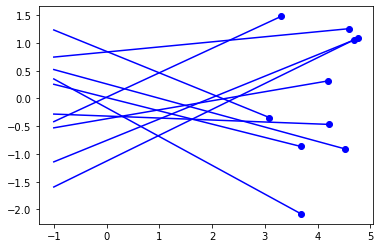

In [ ]:
objeto = np.vstack( (np.random.random( (1,10) )*2+3, np.random.randn(1,10), np.ones(10)) )
P = np.array([ [0,0,0], [0, 0, 0], [0, 0, 0] ]) # Modifique esta matriz!!!
projecao = P @ objeto # Será que essa multiplicação é suficiente para encontrar y_p?

plt.figure()
plt.scatter(objeto[0,:], objeto[1,:], c='b')
for i in range(10):
    plt.plot([objeto[0,i], -1], [objeto[1,i], np.random.randn()], 'b')
plt.show()

# Exercício 17
**Objetivo: entender casos-limite da projeção**

Usando o código que você fez acima, encontre onde são projetados pontos que estão:

1. À esquerda do anteparo, isto é, com a coordenada $x<-1$,
2. Exatamente sobre o anteparo,
3. Entre o anteparo e o pinhole, isto é, $-1 < x < 0$,
4. Exatamente sobre o pinhole
5. Exatamente acima do pinhole

In [ ]:
# Resolva o exercício aqui


# Projeto: a projeção 3D de um cubo

Neste projeto, implementaremos a projeção de um mundo 3D em uma tela 2D usando o algoritmo da pinhole camera. 

O objetivo deste projeto é fazer uma projeção em tempo real de um cubo em *wireframe* que gira em todas as direções, chegando em algo do tipo:

<img src="cubo_girando.gif" width=300>

Neste projeto, é *obrigatório* usar a biblioteca `pygame`, a exemplo do que temos visto. Para desenhar linhas na tela, deve ser usada a função `pygame.draw.line` ou equivalente. Todas as transformações devem ser implementadas manualmente, pelo próprio grupo (uma vez que o objetivo do projeto é examente implementar essas transformações). Não é permitido usar bibliotecas adicionais (OpenGL, funções de câmera do próprio `pygame`, etc.) que resolvam as transformações aplicadas automaticamente. Em resumo: só é permitido usar bibliotecas para resolver os gráficos em 2D, e todas as manipulações em 3D devem ser realizadas por transformações implementadas em `numpy` pelo próprio grupo.

## Algumas anotações teóricas

### Projeções 3D

Uma projeção de 3D para 2D funciona de uma maneira muito parecida com a projeção de 2D para 1D que fizemos na aula. Uma boa ideia é imaginar um mundo 3D com dimensões X, Y, Z, de tal forma que o *pinhole* fica no ponto $[0,0,0]$ e o anteparo fica no plano $z=-d$, com $d$ definido pelo grupo (na aula, tínhamos usado $d=1$, mas isso não é obrigatório).

### Como modelar e posicionar um cubo

Lembre-se que um cubo tem 8 vértices. Se forem colocados num espaço 3D, como eles ficam? Também, entre quais vértices nós devemos desenhar arestas?

Quais são as matrizes que permitem partir dos vértices na posição que você decidir desenhar e levar o cubo para o campo de visão da sua câmera?

### O espaço de pixels

Na tela, a posição $[0,0]$ não corresponde ao meio da tela, e sim ao canto superior esquerdo. Então, após fazer a projeção, é possível que seja necessário fazer uma etapa de translação adicional!

### Rotações em direções arbitrárias

Em 3D, é possível rotacionar pontos ao redor de cada um dos eixos usando as matrizes:

$$
R_x = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \cos(\theta) & -\sin(\theta) & 0 \\
0 & \sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\hspace{0.5in}
R_y = \begin{bmatrix}
\cos(\theta) & 0 & \sin(\theta) & 0 \\
0 & 1 & 0 & 0 \\
-\sin(\theta) & 0 & \cos(\theta) & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\hspace{0.5in}
R_z = \begin{bmatrix}
\cos(\theta) & - \sin(\theta) & 0 & 0 \\
\sin(\theta) & \cos(\theta) & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

Essas matrizes já contém a nossa (necessária) dimensão adicional que permitirá, depois, controlar as translações e projeções.

**ENTREGAS**
* Link para o repositório onde está o programa.
* No `README.md` do repositório, inclua uma descrição de como executar o programa, como usá-lo, etc.
* No `README.md`, inclua uma descrição matemática do modelo que você implementou, incluindo quais transformações foram aplicadas e como as matrizes de transformação funcionam.
* Inclua também, no próprio `README.md`, um GIF com o seu cubo girando no espaço.

**RUBRICA**

O projeto será avaliado usando a rubrica abaixo. Os níveis são cumulativos, isto é, para passar de um nível, *todos* os requisitos dele devem ser cumpridos. As rubricas foram inspiradas nos níveis da [Taxonomia de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/).

| Nível | Descrição | [Tax. de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/) |
| --- | --- | --- |
| F | Não entregue ou entregue sem completar o `README.md`, entregue sem adições em relação ao código visto em sala, entregue usando bibliotecas prontas para realizar transformações | Não fez |
| E | O projeto foi entregue, mas o `README.md` não indica como instalar ou rodar o programa. | Entender (-) |
| D | O projeto roda com alguns travamentos ou o `README.md` não descreve bem o modelo matemático usado ou não tem correpondência com o modelo implementado. | Entender | 
| C | O projeto funciona sem travar e o `README.md` está completo, mas a visualização gera glitches (exemplo: pontos "escapam" da tela) | Compreender |
| B | O projeto funciona bem mas o código está muito confuso e sem comentários | Aplicar |
| A | O projeto obedece a todos os requisitos e o código tem uma correspondência imediata ao modelo matemático descrito no `README.md` | Analisar |
| A+ | O projeto funciona perfeitamente e, em adição aos requisitos pedidos, permite interagir através do mouse mudando a distância focal $d$ | Avaliar |
| A++ | O projeto permite navegar pelo mundo 3D usando mouse e as teclas ASDW, como um jogo em primeira pessoa | Criar |
